In [23]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
from matplotlib import style
style.use('bmh')
style.use('dark_background')
%matplotlib inline

In [24]:
secret = np.binary_repr(int(input("input hidden number")))
print('the binary representation is: ', secret)
secret = list(map(int, str(secret)))
n = len(secret)

input hidden number 567


the binary representation is:  1000110111


In [25]:
def oracle(circuit, secret, n):    
    circuit.barrier()
    for i in range(n-1, -1, -1):
        if secret[i]:
            circuit.cx(n-i-1, n)
    circuit.barrier()

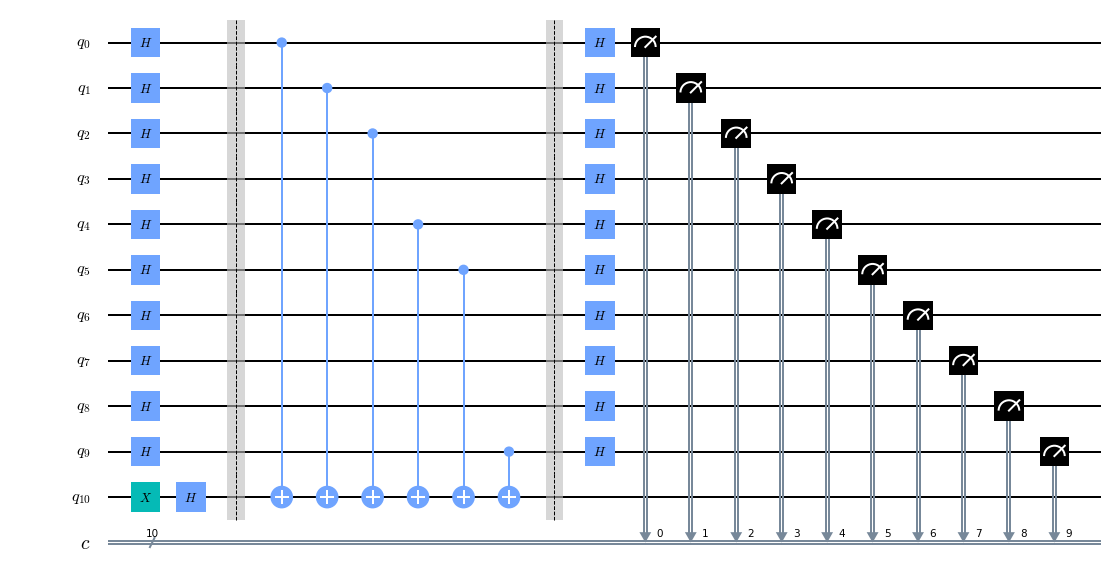

In [26]:
circuit = QuantumCircuit(n+1, n)
circuit.x([n])
circuit.h(range(n+1))
oracle(circuit, secret, n)
circuit.h(range(n))
circuit.measure(range(n), range(n))
circuit.draw(output = 'mpl')

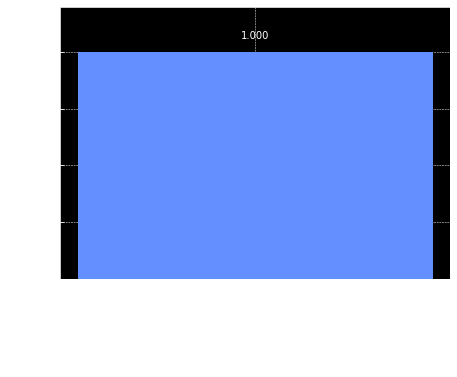

In [27]:
sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, sim, shots = 1).result()
plot_histogram(result.get_counts(circuit))

In [ ]:
def minimumBribes(q):
    bribes = 0
    model = list(range(1, len(q)+1))
    
    while model != q:
        print(model)
        for i in range(1, len(q)):
            if q[i] != (i+1) and q[i] > (i+1):
                if q[i]-(i+1)>2:
                    print('Too chaotic')
                    return
                model[i] = q[i]
                model[q[i] - 1] = i+1
                bribes+=q[i]-(i+1)
    print(bribes)
minimumBribes([1, 2, 5, 3, 7, 8, 6, 4])